# HW 10
___

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### IMDB Movie Database
From [Kaggle](https://www.kaggle.com/PromptCloudHQ/imdb-data): 500 highest rated movies on IMDB from 2006 to 2016, sorted by revenue.

**Read in the file** `'imdb-movie.csv'` with `Title` as the index column. Store the dataframe in `dfmovie`. Make the following changes:

* **Rename** the column 'Runtime (Minutes)' as 'Runtime_min'. 
* **Rename** the column 'Revenue (Millions)' as 'Revenue_mil'.

In [2]:
dfmovie = pd.read_csv('imdb-movie.csv', index_col = 'Title')

In [3]:
dfmovie.rename(columns={'Runtime (Minutes)': 'Runtime_min', 'Revenue (Millions)': 'Revenue_mil'}, inplace=True)
dfmovie.head()

,Genre,Description,Director,Actors,Year,Runtime_min,Rating,Votes,Revenue_mil,Metascore
Title,,,,,,,,,,
Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0
Avatar,"Action,Adventure,Fantasy",A paraplegic marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,7.8,935408,760.51,83.0
Jurassic World,"Action,Adventure,Sci-Fi","A new theme park, built on the original site o...",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",2015,124,7.0,455169,652.18,59.0
The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,623.28,69.0
The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0


In [4]:
dfmovie.dtypes

Genre           object
Description     object
Director        object
Actors          object
Year             int64
Runtime_min      int64
Rating         float64
Votes            int64
Revenue_mil    float64
Metascore      float64
dtype: object

### Movie Descriptions
Write a function **`movie_keyword(word, dfmovie)`** that returns a list of the movies with `Description`s that contain a given word, in alphabetical order. If there are no matches, the function should return an empty list. (*Hint:* Use `.str.contains()`.)

Example:  
`movie_keyword('math', dfmovie)` returns 
```
['Frantz',
 'Hidden Figures',
 'Patriots Day',
 'The Accountant',
 'The Imitation Game',
 'The Man Who Knew Infinity',
 'The imposible']
```

In [5]:
def movie_keyword(word, dfmovie):
    return dfmovie[dfmovie.Description.str.contains('math')].index.sort_values().tolist()

In [6]:
movie_keyword('math', dfmovie)

['Frantz',
 'Hidden Figures',
 'Patriots Day',
 'The Accountant',
 'The Imitation Game',
 'The Man Who Knew Infinity',
 'The imposible']

### Actors and Actresses
Write a function **`actor_movies(name, dfmovie)`** that returns a list of the movies that an actor or actress has appeared in. The list should be in alphabetical order.

Example:  
`actor_movies('Amy Adams', dfmovie[dfmovie.Year == 2013])` returns
```
['American Hustle', 'Her', 'Man of Steel']
```

In [7]:
def actor_movies(name, dfmovie):
    return sorted(dfmovie[dfmovie.Actors.str.contains('Amy Adams')].index.tolist())

In [8]:
actor_movies('Amy Adams', dfmovie[dfmovie.Year == 2013])

['American Hustle', 'Her', 'Man of Steel']

### Directors
Write a function **`director_movies(name, dfmovie)`** that returns a list of the movies that a director has made. The list should be in alphabetical order.

  Example:  
`director_movies('Christopher Nolan', dfmovie)` returns
```
['Inception',
 'Interstellar',
 'The Dark Knight',
 'The Dark Knight Rises',
 'The Prestige']
```

In [9]:
def director_movies(name, dfmovie):
    return sorted(dfmovie[dfmovie.Director == name].index.tolist())

In [10]:
director_movies('Christopher Nolan', dfmovie)

['Inception',
 'Interstellar',
 'The Dark Knight',
 'The Dark Knight Rises',
 'The Prestige']

Write a function **`director_most_movies(dfmovie)`** that returns a list of the director(s) with the most films. If several directors have the same max number of films, return their names in alphabetical order by first name. (*Hint:* Use `.value_counts()`.)

  Examples:<br>
  `director_most_movies(dfmovie[dfmovie.Year == 2008])` returns
```
['Clint Eastwood']  
```
  <br>

  `director_most_movies(dfmovie[dfmovie.Year < 2011])` returns
```
 ['Christopher Nolan',
   'Danny Boyle',
   'David Fincher',
   'David Yates',
   'Ridley Scott']
```

In [11]:
def director_most_movies(dfmovie):
    directorFreqSeries = dfmovie.Director.value_counts()
    
    return sorted(directorFreqSeries[directorFreqSeries == directorFreqSeries.max()].index.tolist())

In [12]:
director_most_movies(dfmovie[dfmovie.Year == 2008])

['Clint Eastwood']

In [13]:
director_most_movies(dfmovie[dfmovie.Year < 2011])

['Christopher Nolan',
 'Danny Boyle',
 'David Fincher',
 'David Yates',
 'Ridley Scott']

Write a function **`director_most_revenue(dfmovie)`** that determines the  name of the director with the highest total revenue. Assume that there is a single director.

Example:<br>
`director_most_revenue(dfmovie[dfmovie.Year == 2012])`<br>
returns `'Joss Whedon'`.

In [14]:
def director_total_revenue(dfmovie, director):
    return sum(dfmovie['Revenue_mil'][dfmovie.Director == director])

In [15]:
# need to take add the revenues of every movie the director made
def director_most_revenue(dfmovie):    
    '''Want to get a series of every director and the sum of the revenues from all the movies they made'''
    revenues = []  
    for d in dfmovie.Director.unique():
        revenues.append(director_total_revenue(dfmovie, d))  # populate a list of every directors total revenues
    
    revSeries = pd.Series(revenues, index = dfmovie.Director.unique()).sort_values(ascending = False)  # sort a series
    return revSeries.index[0] 

In [16]:
director_most_revenue(dfmovie[dfmovie.Year == 2012])

'Joss Whedon'

**Create a bar chart** showing the top 10 revenue-generating directors from 2006 to 2012 with the director names on the horizontal axis and the total revenue on the vertical axis.

  <img src="http://www.coloradomath.org/python/movie-dirs-rev.jpg" width="420" height="396" />

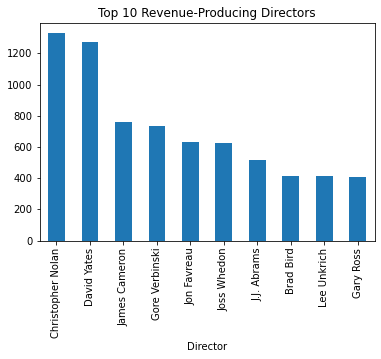

In [17]:
newdf = dfmovie[dfmovie.Year.between(2006,2012)]

revenues = []  
for d in newdf.Director.unique():
    revenues.append(director_total_revenue(newdf, d))  # populate a list of every directors total revenues
    
revSeries = pd.Series(revenues, index = newdf.Director.unique()).sort_values(ascending = False)
revSeries.head(10).plot(kind = 'bar')
plt.title('Top 10 Revenue-Producing Directors')
plt.xlabel('Director')
plt.show()

In [18]:
dfmovie.head()

,Genre,Description,Director,Actors,Year,Runtime_min,Rating,Votes,Revenue_mil,Metascore
Title,,,,,,,,,,
Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0
Avatar,"Action,Adventure,Fantasy",A paraplegic marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,7.8,935408,760.51,83.0
Jurassic World,"Action,Adventure,Sci-Fi","A new theme park, built on the original site o...",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",2015,124,7.0,455169,652.18,59.0
The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,623.28,69.0
The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0


### Genres
Each entry in the `'Genre'` column corresponds to a comma-separated list of genres. 

Write a function **`genres_all(dfmovie)`** that returns an alphabetical list of the possible genres in `dfmovie`. Only include the names that appear between the commas. For example, `'Action, Sci-Fi'` should be split into two genres: `'Action'` and `'Sci-Fi'`.

Example:<br>
`genres_all(dfmovie.head())` returns<br>
`['Action', 'Adventure', 'Crime', 'Drama', 'Fantasy', 'Sci-Fi']`.

In [19]:
def genres_all(dfmovie):
    string = ''
    for g in dfmovie.Genre.unique():
        string += g + ','

    genreSet = set()
    for g in string.split(','):
        if g != '':
            genreSet.add(g)

    return sorted(list(genreSet))

In [20]:
lst = genres_all(dfmovie.head())
lst

['Action', 'Adventure', 'Crime', 'Drama', 'Fantasy', 'Sci-Fi']

Write a function **`genres_summary(dfmovie)`** that returns a dataframe with index labels corresponding to the genres in `dfmovie`, and columns corresponding to the genre `Counts`, average `Runtime_min`, average `Rating`, and average `Revenue_mil`. It should call `genres_all()`.

  Example:<br>
  `genres_summary(dfmovie.head())` returns the dataframe
  
|              | Counts | Runtime_min | Rating   | Revenue_mil | 
| :--          | --:    | --:         | --:      | --:         | 
| **Action**   | 5      | 143.400000  | 8.000000 | 701.184000  | 
| **Adventure**| 3      | 140.666667  | 7.633333 | 783.106667  | 
| **Crime**    | 1      | 152.000000  | 9.000000 | 533.320000  | 
| **Drama**    | 1      | 152.000000  | 9.000000 | 533.320000  | 
| **Fantasy**  | 2      | 149.000000  | 7.950000 | 848.570000  | 
| **Sci-Fi**   | 2      | 133.500000  | 7.550000 | 637.730000  |  


In [149]:
def genres_summary(dfmovie):
    Genres = genres_all(dfmovie)
    Counts = []
    Runtime_min = []
    Rating = []
    Revenue_mil = []
    for g in Genres:
        # populate lists with the counts, rating avg, etc, for the respective genre
        newdf = dfmovie[dfmovie.Genre.str.contains(g)]
        Counts.append(newdf.Genre.count())
        Runtime_min.append(newdf.Runtime_min.mean())
        Rating.append(newdf.Rating.mean())
        Revenue_mil.append(newdf.Revenue_mil.mean())
    genreData = list(zip(Counts, Runtime_min, Rating, Revenue_mil))
    genreSummary = pd.DataFrame(genreData, columns = ['Counts', 'Runtime_min', 'Rating', 'Revenue_mil'], index = Genres)
    return genreSummary

In [150]:
genres_summary(dfmovie.head())

,Counts,Runtime_min,Rating,Revenue_mil
Action,5,143.400000,8.000000,701.184000
Adventure,3,140.666667,7.633333,783.106667
Crime,1,152.000000,9.000000,533.320000
Drama,1,152.000000,9.000000,533.320000
Fantasy,2,149.000000,7.950000,848.570000
Sci-Fi,2,133.500000,7.550000,637.730000


### Ratings and Metascores

Sort the `Rating`s in the database in increasing order and plot them as a line graph.

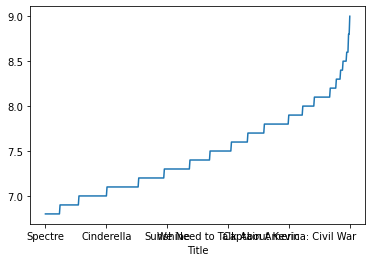

In [154]:
dfmovie.Rating.sort_values().plot()
plt.show()

Sort the `Metascore`s in the database in increasing order and plot them as a line graph.

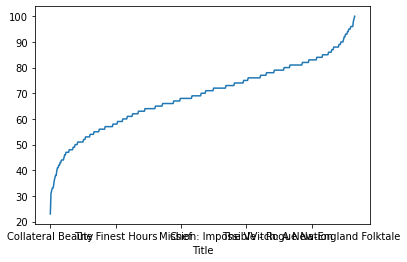

In [155]:
dfmovie.Metascore.sort_values().plot()
plt.show()

There should be a strong relationship between the `Rating` and `Metascore` columns. 

**Create a scatter plot** with `Rating` on the horizontal axis and `Metascore` on the vertical axis.

**Add a trend line** to the plot. The `df_trend_line()` function below returns the $m$ and $b$ values for the $y=mx+b$ trend line given two  columns of numerical data in a dataframe. Call `df_trend_line(dfmovie, 'Rating', 'Metascore')`.

<br>
 <img src="http://www.coloradomath.org/python/movie-scatter-rating.jpg" width="475" height="316" />

In [159]:
def df_trend_line(df, xcol, ycol):
    '''
    Return the (m, b) values for a trend line
    y = mx + b given a dataframe and the names
    of two columns
    '''
    # first remove NaNs
    df2 = df.dropna()
    
    # extract column values
    xvals = df2[xcol].values
    yvals = df2[ycol].values
    
    # fit a line to the points
    m, b = np.polyfit(xvals, yvals, deg=1)
    
    return m, b

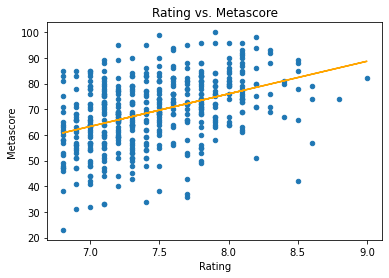

In [165]:
dfmovie.plot(x = 'Rating', y = 'Metascore', kind = 'scatter')
m,b = df_trend_line(dfmovie, 'Rating', 'Metascore')
xvals = dfmovie.Rating
plt.plot(xvals, m*xvals + b, c = 'orange')
plt.title('Rating vs. Metascore')
plt.show()